# Artificial Neural Networks II - Hebbian Learning

### MSc Cesar Arturo Angeles Ruiz 

## Hebbian Learning 

After the appearance of the first logic and linear neuron representations, greater advances in the world of computation and neurosciences were made. Firstly, the understanding of the not-that-binary nature of neurons introduced new ideas on how these could be utilised to create intelligent systems. From a computational perspective, __the development of the transistor in the 1960s__ as the main computation device and the beginning of the Moore era started giving the computational power that such algorithms needed in order for __the second wave__ of interest __of AI to emerge__. 

<img src="imgs/transistor.png" alt="Drawing" style="width: 250px;"/>

On this laboratory, the development of further neural network architectures and algorithms will be explored. We will start with the simple previous concept coined by __Frank Rosenblatt during the 50s__ and the LTU. However, this time, implementing the learning of the neural net with the ideas explored by __Donald Hebb in the 1949s__ of reinforced connected neurons. Afterwards, we will explore their application and some of the considerations and phenomena that are introduced using this methodology. Furthermore, we will see that this new concept allowed for muliple neurons to be stacked within a computational graph. That gave more powerful capabilities to neural networks to learn complex patterns, quality that returned the focus for further research and utilisation as the main agent in the world of AI and has stayed until then. 

<img src="imgs/neuralnet.gif" alt="Drawing" style="width: 400px;"/>

### So without further ado, 
#### Lets get back to the 60s and discover their power of computation! 

<img src="imgs/backfuture.gif" alt="Drawing" style="width: 300px;"/>

## Hebbian Learning and the LTUs

After the proposal of the first topology for a learning neuron, the world of AI went into a slow evolution that led to a halt. The __normal equation__ proposed a fairly formal methodology to train these neurons, that was supported not only by fundamental mathematics; but also some statistical and probabilistic theorems. However, this same power and backup were the same that constraned their utilisation to only __well behaved intelligent systems__. Data that was slightly more caotic and with other than normal distributed, had some problems and convergence problems, specially for regression tasks. 
<img src="imgs/normal.png" alt="Drawing" style="width: 300px;"/>


At the end of the 1940's, a new light for neural nets came again from a deeper study result in the area of biological psychology. Coming from the humble town of Chester, Canada; the __Neuro-psychologist: Donald Hebb__, brought together two of the most important realms in human behaviour. On his book, _"**The Organisation of Behaviour (Wiley)**"_ , Hebb proposed what was considered as one of the biggest contributions in the field of neurosciences. __The connection between human perception__ and the biological behaviour of __our biological neural networks__.

<img src="imgs/hebb.jpg" alt="Drawing" style="width: 300px;"/>

He observed that input stimuli coming any of our senses generated spikes of receptory organs' neurons. As the subject in test used to receive more and more inputs, constant spikes started being stronger and stronger -- increasing the amount of connectivity between input and receiving neuron. This therefore, led to the idea on how __humans' brains create new connections and reinforce neural paths during the learning process__. This important discovery led to the realisation of the biological and psychological mechanism of the human brain, and an would inspire one of the algorithms that made neural networks become one of the most important learning agents until now. 

The previous behaviour was denominated Hebbian learning in honour of Donald Hebb. He would have been quoted later by __Professor Dr Siegrid Löwel__ as *_Neurons that fire together, wire together_*, which would inspire a nover learning algorithm for LTU that would later allow for new types of networks with less strict mathematical and statistical assumptions. 

<img src="imgs/synapse.jpg" alt="Drawing" style="width: 300px;"/>


## Perceiving Flowers with Hebbian Leaning

To demonstrate the __power of perceptrons through hebbian learning__, lets implement a more visual and easy example. 

One of the most basic exercises (something like the Hello World in machine learning) is to make a system learn to identify different types of flowers depending on their physical characteristics. That is the length of their leaves, width, colour; among others. These characteristics can be easily coming from an image or directly as a database of collected samples. The origin of the data does not make a difference. 

Due to its large utilisation in the world of machine learning, the dataset can be find within the __datasets__ module within the sklearn library. 


#### So lets load it now and implement our first Hebbian adapted LTU.

<img src="imgs/ready.gif" alt="Drawing" style="width: 200px;"/>

Lets begin by importing our support modules and two new ones: 

```python
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle 

```

As any other machine learning task, remember that is of __vital importance__ to generate the training and test set. Remember that __data snooping__ is one of the main reasons a model could badly fail, and its effects can only be seen until new data arrives -- which happens mainly during deployment. For that reason, it will be strongly emphasised during the duration of the course.  

For that reason, the new ```python sklearn.model_selection ``` module will help us easily generate date splits evenly between predictor variables and their target values. 

As we will see, neural networks have quite a condition given by the initialisation of their parameters and the order for which they are trained. For that reason, the module ```python sklearn.utils ``` will give us full control on the position of the data and some other randomising functions for these purposes.


Finally, ```python Sklearn.datasets``` module have a series of experimental benchmarking sets for you to try new and novel algorithms. Our flowers datasets can be found here. Lets load it to begin with as:

```python
from sklearn.datasets import load_iris

```




In [24]:
# Your imports and data loading code here!!
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import load_iris
import pylab
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle 
from scipy import stats
import pandas as pd

In [25]:
## Import the dataset module and load tghe IRIS dataset!
iris = load_iris()

Now, the iris dataset is imported as a vert specific Data structure. The return value is a dictionary with different fields that comprises values such as: the description, the data, target values; etc. 

To access the relevant values of the dictionary we just need to access it through their attributes:

```python
# Eg loading the iris dataset and selecting data:
LENGTH = 2; WIDTH = 3


iris = load_iris()
X = iris.data[:, (LENGTH, WIDTH)]
y = iris.target

```

Remember the first and most important parts from any machine learning exercise are the initial exploration. So first try to respond to some questions such as:

- What is the meaning of each column?
- How many flower types do I have? How are they encoded? 
- How many samples per category are there? Which distributions do they have?
- What are the expected first and second moments of each feature, are they learnable?




In [26]:
## Generate the data column macros and explore the iris dataset
# Instanciate both X and y frames and explore some of the features and distributions through an EDA
LENGTH = 2; WIDTH = 3
SETOSA = 1

In [27]:
X = iris.data[:, (LENGTH, WIDTH)]
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [28]:
## Print feature names and class names
print(feature_names)
print(target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [29]:
# Print first 10 values of petal length, width and it classes; as dataFrames
print('Petal length and width first 10 values: \n\n',pd.DataFrame(X[:10,:],columns=['Petal Length','Petal Width']).to_markdown())
print('\nClass for first 10 values: \n\n',pd.DataFrame(y[:10],columns=['Class']).to_markdown())

Petal length and width first 10 values: 

 |    |   Petal Length |   Petal Width |
|---:|---------------:|--------------:|
|  0 |            1.4 |           0.2 |
|  1 |            1.4 |           0.2 |
|  2 |            1.3 |           0.2 |
|  3 |            1.5 |           0.2 |
|  4 |            1.4 |           0.2 |
|  5 |            1.7 |           0.4 |
|  6 |            1.4 |           0.3 |
|  7 |            1.5 |           0.2 |
|  8 |            1.4 |           0.2 |
|  9 |            1.5 |           0.1 |

Class for first 10 values: 

 |    |   Class |
|---:|--------:|
|  0 |       0 |
|  1 |       0 |
|  2 |       0 |
|  3 |       0 |
|  4 |       0 |
|  5 |       0 |
|  6 |       0 |
|  7 |       0 |
|  8 |       0 |
|  9 |       0 |


In [30]:
petal_length_mean = X[:,0].mean() # Obtain mean of petal length
petal_length_std = X[:,0].std() # Obtain standard deviation of petal length
petal_length_median = np.median(X[:,0]) # Obtain median of petal length
petal_length_mode= stats.mode(X[:,0]) # Obtain mode of petal length
petal_length_range = X[:,0].max() - X[:,0].min() # Obtain range of petal length

In [31]:
print("The petal length mean is: {} cm".format(petal_length_mean)) # Print petal length mean
print('The petal length mode is: {} cm'.format(petal_length_mode[0].item())) # Print petal length mode
print('The petal length median is: {} cm'.format(petal_length_median)) # Print petal length median
print('The petal length range is: {} cm'.format(petal_length_range)) # Print petal length range
print('The petal length std is: {} cm'.format(petal_length_std)) # Print petal length standard deviation

The petal length mean is: 3.7580000000000005 cm
The petal length mode is: 1.4 cm
The petal length median is: 4.35 cm
The petal length range is: 5.9 cm
The petal length std is: 1.759404065775303 cm


In [32]:
petal_width_mean = X[:,1].mean() # Obtain mean of petal width
petal_width_std = X[:,1].std() # Obtain standard deviation of petal width
petal_width_median = np.median(X[:,1]) # Obtain median of petal width
petal_width_mode= stats.mode(X[:,1]) # Obtain mode of petal width
petal_width_range = X[:,1].max() - X[:,1].min() # Obtain range of petal width

In [33]:
print("The petal length mean is: {} cm".format(petal_width_mean)) # Print petal width mean
print('The petal length mode is: {} cm'.format(petal_width_mode[0].item())) # Print petal width mode
print('The petal length median is: {} cm'.format(petal_width_median)) # Print petal width median
print('The petal length range is: {} cm'.format(petal_width_range))  # Print petal width range
print('The petal length std is: {} cm'.format(petal_width_std)) # Print petal width standard deviation

The petal length mean is: 1.1993333333333336 cm
The petal length mode is: 0.2 cm
The petal length median is: 1.3 cm
The petal length range is: 2.4 cm
The petal length std is: 0.7596926279021594 cm


[0 1 2]


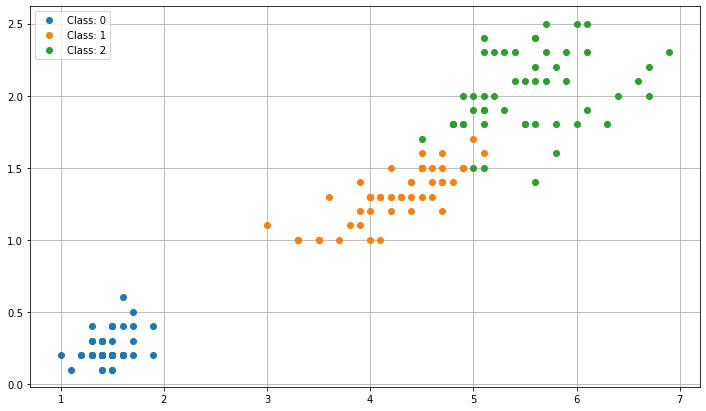

In [34]:
#Plot classes and their distribution
labels = np.unique(y)
print(labels)
plt.figure(figsize=(12,7))
for label in labels:
    plt.plot(X[:,0][y==label], X[:,1][y==label], 'o', label = "Class: {}".format(label))
    
plt.grid()
plt.legend()

## Implementing Perceptron Hebbian Learning 

Now, once we know all the type of data and their distribution, lets see what the Perceptron can do. 
As seen in the theory, __Hebbian learning__ focuses on reinforcing connections that lead to correct outputs. For this, a first trial an error method has to be applied. Just as human learning, __Hebbian learning__ starts by trying to guess what is needed to be achieved. Once the first try is done, the __output is compared to the desired target__ and a cost function proportional to this __deviation or error__ is calculated. 

After the deviation is quantified, the __weights and biases of each neuron__ get tweaked in the direction opposite of the error. In this manner, if error is big, the weights get lowered down such that the amount of transmission is decreased --decreasing the error for future samples this way. This is the esence of essence of hebbian learning, and as we will see in the future, of a group of the most effective training algorithms in machine learning. 

<img src="imgs/backpropagation.gif" alt="Drawing" style="width: 400px;"/>


The previous method can be described mathematically in the following manner:

Remembering the LTU notation:

<img src="imgs/ltu.png" alt="Drawing" style="width: 400px;"/>

If a neuron has a set of connections given by $w_s$ then we can define the following training method:

#### Hebbian Rule


$$ w_{ij} = w_{ij}^{t=-1} + \nu (y_j - w_{ij}^TX_j)X_j  $$


Where:

- $w_{ij}$ is the ith weight going to the ith neuron.
- $y_j $ is the jth training instance target.
- $X_j$ is the jth input matrix.
- $\nu$ is the learning rate. 

In this manner, each  error will guide us how to tweak each parameter for the error to grow smaller every time. 

In the next piece of code, we can observe the shell of a __learning predictor agent__ capable of implementing hebbian learning as its main algorithm. Complete the code so it is able to:

- Be trained according to hebbs learning algorithm (also known as __Hebbs rule__) 
- Keep its weights, biases.
- Be able to make predictions according to certain new instances. 
- return the trained weights.
- Store the error per training step and plot it within a class method. 

### Complete the empty spaces


```python
class SingleLinearThresholdUnit(BaseEstimator, TransformerMixin):
    
    def __init__(self, threshold = 0, learning_rate = 0.01, epoch = 10):
        self.learning_rate = learning_rate
        self.threshold = threshold
        self.epoch = epoch
        self.e_ = None 
        self.w_ = None
        self.error_evol = np.array([])
        
    @staticmethod
    def _format(x):
        if not isinstance(x,(np.generic, np.ndarray)):
            return np.array(x)
        else:
            return x
        
    def _biasing(self, X):
        if self.w_.shape[1] != X.shape[1]:
            X = np.c_[X, np.ones(len(X))]
        return X
        
            
    
    def predict(self, X):
        ...
        
        return ___
    
    def fit(self, X, y):
        avg_error = 0
        self.e_ = 0
        ...
        ...
                
            
    def get_line(self):
        return self.w_
    def get_error(self):
        return self.e_
    def plot_error(self):
        plt.___

```

## Using the Perceptron to Discover Patterns.

Once the perceptron is ready and working, a training protocol has to defined. A good algorithm is no the only thing needed for a learning agent to perform. 



### Weight Initialisation

Neural network weights suffer from a phenomenon called freezing. That phenomenon it is observed when the initial values of the weights are found to be symmetric. If that is the case, then the network is said to be freezed and the learning underperforms possibly for getting into local minima or other factors. It has been found that a neural network to aviod this erratic behaviour, noise has to be added to initial weights in order to break symmetry. These augments the probability of these networks to find the global optimum or realy good local optima within the search space. 

### Hyperparameter definition

Another factor that really affects neural networks is the value of the hyperparamethers. In reality, each weight within the network, activation functions and even training methodology; can be defined as hyperparameters. However, between each architecture the main parameters to be tuned by us are the hyperparameter __learning rate__ $\nu$ in the previous equation and the __training batch__. The first one accounts for the amount of error each weight will be tweaking according to each instance. It is a measure of the importance on each instance and its error to correct. 

The training batch readily is the number of elements to trained at once before to test its performance. This period of time is denominated as __epoch__ and once each epoch finishes training, the network is ready to receive more instances to observe its performance or to make predicitons.

## These factors have to be taken into account while getting the neuron into its initial state.


### Write the initialisation or constructor methods by taking into account these factors

### Hint:  The ```python sklearn.utils ``` module could readily be of great use for this.



```python 

class SingleLinearThresholdUnit(SingleLinearThresholdUnit):
    
    def fit(self, X, y):
        avg_error = 0
        self.e_ = 0
        
        
        y = self._format(y)
        N = len(X)

        
        self.w_ = ____
        X = self._biasing(self._format(X))
        
        for lapse in range(self.epoch):
            X, y = shuffle(X, y)
            avg_error = 0
            self.e_ = 0
            for idx, x in enumerate(X):
                
                self.e_ = y[idx] - self.predict(x.reshape(1,-1))
                
                self.w_ = self.w_ + self.learning_rate*self.e_*x
                avg_error += self.e_/float(N)
            self.error_evol = np.append(self.error_evol, avg_error)
```               
            
#### Try implementing the fit method by class spreading in the cell below

### Balanced Classes

One of the main things to consider to train neural networks come from a statistical reality: __class balance__. Due to the way it is trained, neural networks are sensitive the number of instances each class appears. If more  observations are to be found of a particular class, then the neural net will benefit the classification of that class. For that reason, balancing the classes is strongly encouraged when possible --otherwise more data will be needed or splitting the data to the size of roughly the minimum class can help. 


To split the class evenly we first can classify the number of occurrences by label. Use __numpy's slicing__ to select an even number of __Iris Setosa__ class __(y = 1)__ vs the rest.

After that use the ```Python sklearn.model_selection ``` module to load the ```Python train_test_split ``` function. This function allows you to split the data into __test and training sets__ depending on a particular condition.


You can implement the train test split in the following manner:

```Python 

X_train, X_test, y_train, y_test = train_test_split(...
                                                    ...)
```

This returns a tuple of four with training and test arrays. 



In [35]:
## Your data slicing and splitting code here. 
y_new = np.array((y==SETOSA)).astype(float) # Create new array where setosa class is 1, versicolor and virginica are 0
y_new  = y_new[:100] # Grab the first 100 elements of new Y array
X = X[:100] # Grab the first 100 rows 

In [36]:
#Divide our new X and Y, in train and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.33, random_state=42)

## Error plot

A good way to see if the neural network is converging towards the expected targets, a good visualisation of the error between instances is of great use. This not only helps us to verify if our hyperparameters and/or assumptions made about the data, are the correct ones before spending hours training without results. But, it also allows us to __gain insights__ about the range of values the __training batch and learning rate could have in order for the network to start converging__. 

This is the main reason of why an error state is of great importance during a network training. So lets now implement ours:

## Complete the following code to generate an error plot and remember to instanciate an error array during training 


```Python 

class SingleLinearThresholdUnit(SingleLinearThresholdUnit):
    
    def error_plot(self):
        ...
        ...
        
    def get_line(self):
        ...
        ...
    
    
```

# Training the network

Once is all set, now it is time to train and test your network. Using the __fit method__ train a Hebbian powered LTU and start training it! 
Start by setting a __learning rate of 1__. Use all the samples, __randomly__ to train the network and answer the following questions:

Plot the error graph and explore: 

- Is the learning rate value right or is the error diverging.
- What is the effect of training without shuffling the data?
- Is the class balance affecting experimenting the LTU training?!





    

#### After reaching a fair enough result note down the amount of epochs and learning parameter and answer the following:


- What is the meaning of each of the weights found by the network?
- What was the role of the epoch while experimentally training the LTU?!
- How does it compare with using the normal equation? Was it faster? Easier?!




In [37]:
class SingleLinearThresholdUnit(BaseEstimator, TransformerMixin):

    def __init__(self, threshold = 0, learning_rate = 0.01, epoch = 10):
        self.learning_rate = learning_rate
        self.threshold = threshold
        self.epoch = epoch
        self.e_ = None 
        self.w_ = None
        self.error_evol = np.array([])

    @staticmethod
    def _format(x):
        '''
        X: numpy array of shape (N,M)
        
        Transforms X into a numpy array
        '''
        if not isinstance(x,(np.generic, np.ndarray)):
            return np.array(x)
        else:
            return x

    def _biasing(self, X):
        '''
        X: numpy array of shape(N,M)
        
        Add columns of 1's to our X
        '''
        if self.w_.shape[0] != X.shape[1]:
            X = np.c_[X, np.ones(len(X))]
        return X



    def predict(self, X):
        '''
        X: numpy array of shape(N,M)
        
        Predict class of X, based on the weights obtained through Hebbian Learning
        '''
        X = self._biasing(X)
        return (self.w_.dot(X.T) > self.threshold).astype(float)

    def fit(self, X, y):
        '''
        X: numpy array of shape (N,M)
        y: numpy array of shape (L,)
        
        Obtain the best line fit through Hebbian Learning, that best divides our classes    
        '''
        self.e_ = 0 # Error 
        N,M = X.shape # Obtain shape of predictors variables

        self.w_ = np.random.random((M+1,))*np.sqrt(2/X.size) # Weight initilization
        X = self._biasing(X) # Call biasing function to add column of 1's to our predictor variables
        
        for lapse in range(self.epoch):
            X, y = shuffle(X, y) # Shuffle our X and y
            avg_error = 0 # Avg error through epoch
            for idx, x in enumerate(X):
                
                self.e_ = y[idx] - self.predict(x.reshape(1,-1)) # Obtain prediction with weights
                self.w_ = self.w_ + self.learning_rate*self.e_*x # Update weights via lerning rate and error of prediction
                avg_error += self.e_/float(N) # Obtain average error
                
            self.error_evol = np.append(self.error_evol, avg_error) # Append avg_error to error_evol, to see error evolution through epochs
        


    def get_line(self):
        '''
        Returns the weights obtained through Hebbian Learning
        
        '''
        return self.w_
    
    def get_error(self):
        '''
        Returns the error obtained through Hebbian Learning
        
        '''
        return self.e_
    
    def plot_error(self):
        '''
        Plot the error evolution through the epochs
        
        '''
        plt.figure(figsize=(12,7))
        plt.plot(self.error_evol)
        plt.grid()
        plt.xlabel('Epoch')
        plt.ylabel('Error')

In [38]:
## Your training and plotting functions here 
# Remember start with a learning rate of 1 ans with 10 epochs 
# Use the final average error per epoch to guide yourself towards the best hyperparameters 

SebasNeuron = SingleLinearThresholdUnit(learning_rate=.005, epoch=10)
SebasNeuron.fit(X_train,y_train)

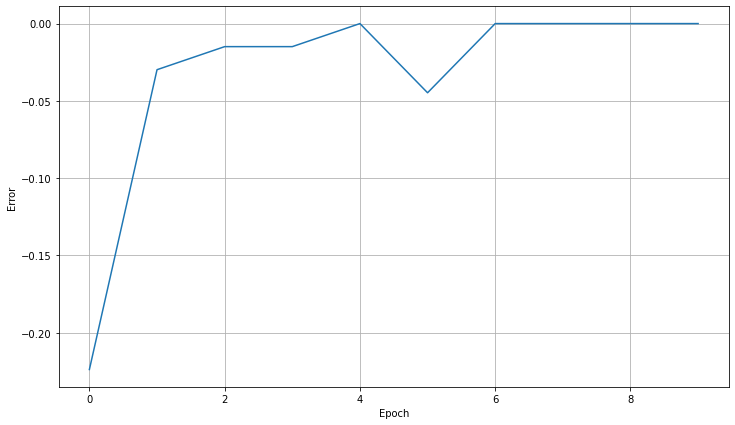

In [39]:
SebasNeuron.plot_error()

In [40]:
SebasNeuron.get_line()

array([-0.00113617,  0.07486953, -0.05282034])

#### Use the following code to plot the 2D projection of the decision boundary found and overlap the desired instances 

```Python 

def plot_projection(w, x):
    y =  -(w[0]*x + w[2])/w[1]
    plt.plot(x,y)
    
```


- What is the relation between the networks weights and the line given?!
- Which learning algorithm will you use and when, according to the task?



In [41]:
## Your plotting code here
# Use the error plot to see the evolution of the error over time

def plot_projection(w, x):
    y =  -(w[0]*x + w[2])/w[1]
    plt.plot(x,y)

[0 1 2]


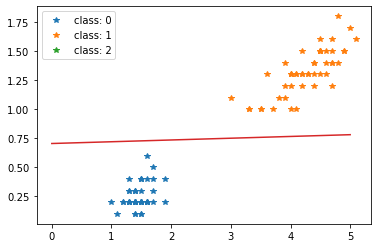

In [42]:
labels = np.unique(y)
print(labels)

for label in labels:
    plt.plot(X[:,0][y_new==label], X[:,1][y_new==label], '*', label = "class: {}".format(label))
    
plt.legend()

t = np.linspace(0,5,1000)

plot_projection(SebasNeuron.get_line(),t)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
y_pred = SebasNeuron.predict(X_test)

In [45]:
print(confusion_matrix(y_test,y_pred))

[[19  0]
 [ 0 14]]


In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        14

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



## You have made it so far!

Congratulations if you had reached this far. __Training neural nets__ might not be an easy taks. So many factors start entering into play with such powerful algorithms. Their __capabilities that made them incredible versatile agents are the same that made them really noisy__. For that reason neural networks are of the lasts algorithms that are usually used when __white box__ or other simpler models fail to properly learn from data. However, you should fear not of their power. By understanding how each factor affect, a bit of patience and luck could give your next project a __massive amout of intelligence__.

Now you know a bit more about neural nets and their implementation consequences. Just as they could be great algorithms, they could be a nightmare. That is the reason so much research has been delved into them. Moreover, the __story just begins here__. Neural nets and their algorithms have evolved into real autonomous machines. Capable of learning from your voice or to drive a car. 

<img src="imgs/robfail.gif" alt="Drawing" style="width: 300px;"/>

#### Well... Nearly 🙄.

In the next laboratory, we will see how these ideas from __Donald Hebb and Frank Rosenblatt__ were utilised to derive an even more powerful learning algorithm that was capable of getting into any data scientist __deepest dream__. We will see how this lead neural nets to evolve and which unbelievable applications were allowed to exist! 
so

<img src="imgs/deepdrm.jpg" alt="Drawing" style="width: 400px;"/>

## Congratulations 

Cheer up and see you next time!

<img src="imgs/bye.gif" alt="Drawing" style="width: 400px;"/>
